In [46]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from utils.ticker_data import get_stock_data
from utils.modelling import gbm

c:\Users\borishan\Desktop\ml\code\ml_vs_baseline_reits\utils\ticker_data.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start.strftime('%Y-%m-%d'), end=end.strftime('%Y-%m-%d'))
[*********************100%***********************]  1 of 1 completed


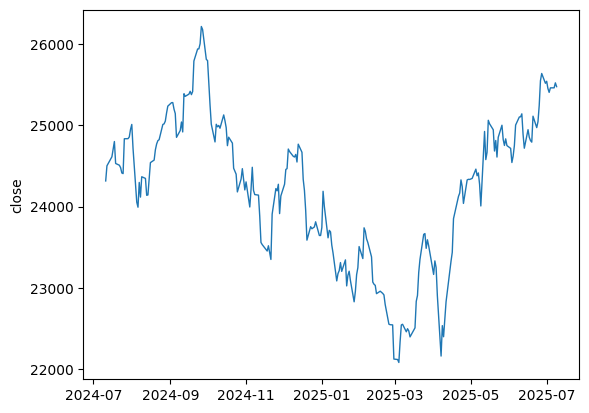

In [47]:
df = get_stock_data("^NSEI")
plt.ylabel("close")
plt.plot(df.Date, df.Close, lw = 1)
plt.show()

In [48]:
returns = df.Returns
mu, sigma = returns.mean(), returns.std()
stat, pval = stats.kstest(returns, 'norm', args=(mu, sigma))

print(f"ks stat {stat:.4f} p-value: {pval:.4f}")

ks stat 0.0701 p-value: 0.1684


In [49]:
N = len(df)
S0 = df.Close[0]
mu, std = df.Returns.mean() * N, df.Returns.std() * np.sqrt(N)
dt = 1/ N

(N, S0, mu, std)

(247,
 np.float64(24315.94921875),
 np.float64(0.046258757215893606),
 np.float64(0.13497143768382142))

MAPE: 9.153 %


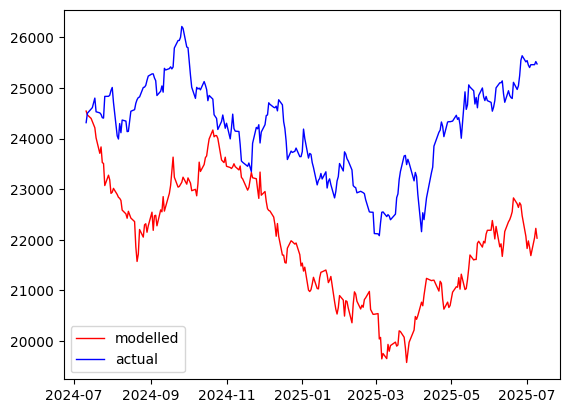

In [50]:
prices = gbm(S0, mu = mu, sigma=std, N=N)
mape = 100 * np.sum(np.abs(prices - df.Close)/df.Close)/len(prices)
print(f"MAPE: {mape:.3f} %")

plt.plot(df.Date, prices, lw = 1, c= 'r', label= "modelled")
plt.plot(df.Date, df.Close, lw = 1, c= 'b', label="actual")
plt.legend()
plt.show()

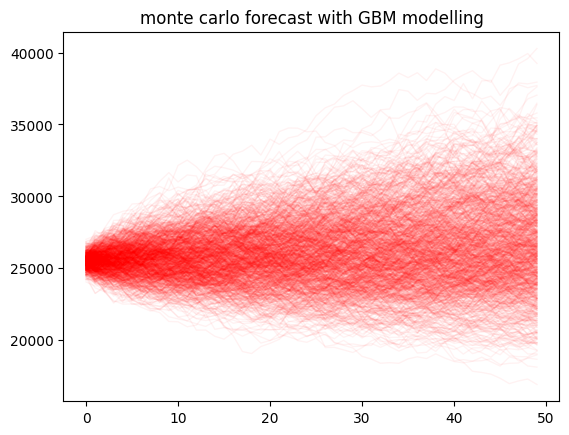

In [53]:
N = 50
# dates = pd.bdate_range(start=df.Date.iloc[-1] + pd.Timedelta(days=1),periods=N)
for _ in range(1000):
    plt.plot(gbm(df.Close.iloc[-1], mu = mu, sigma=std, N=N), lw = 1, c= 'r', alpha = 0.05)
    # plt.plot(dates, gbm(df.Close.iloc[-1], mu = mu, sigma=std, N=N), lw = 1, c= 'r', alpha = 0.1)
plt.title("monte carlo forecast with GBM modelling")
plt.show()